In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == "g").astype(int)
df["class"].unique()

array([1, 0])

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

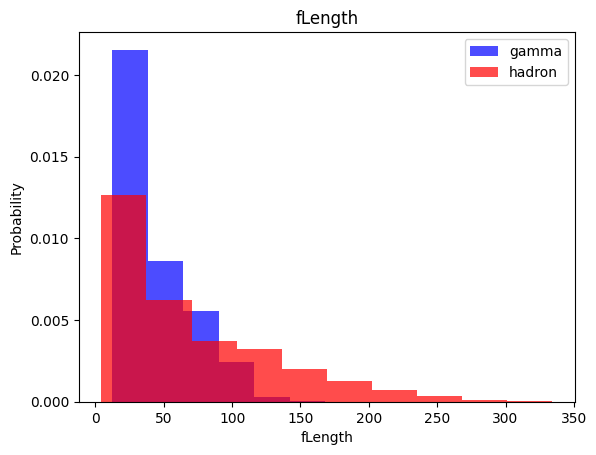

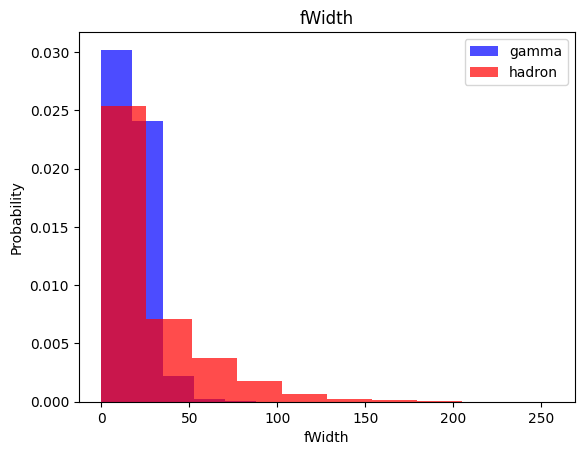

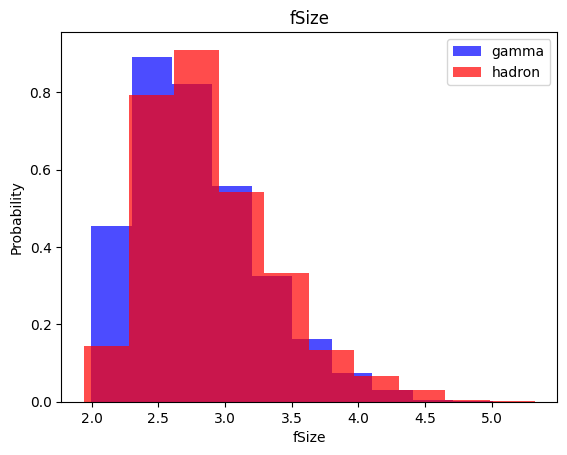

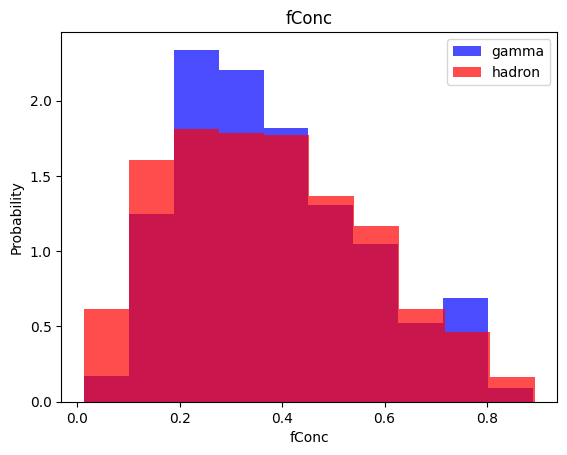

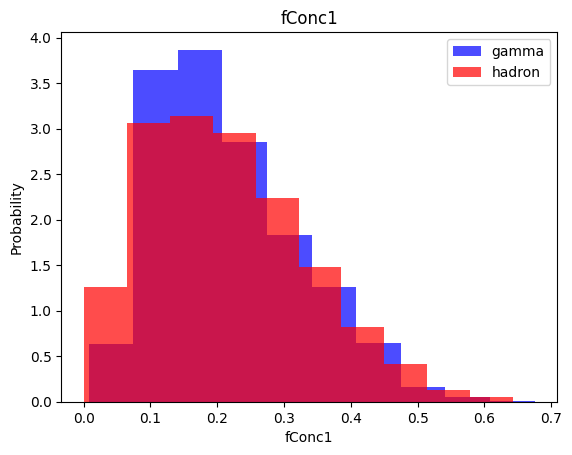

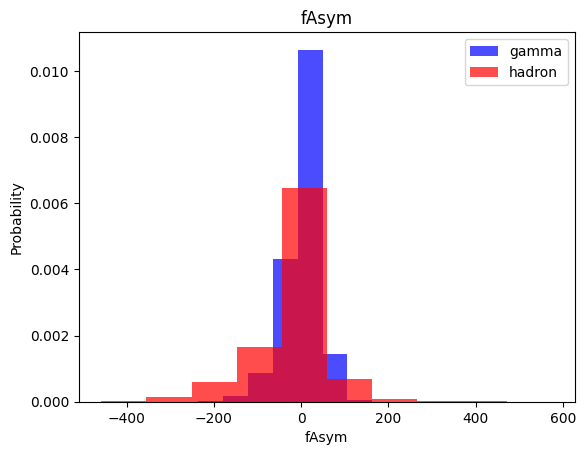

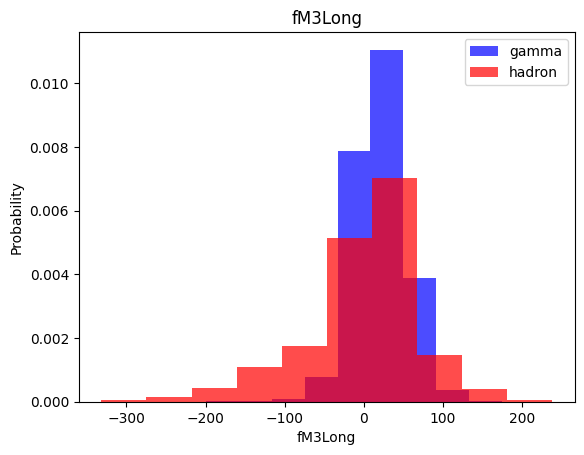

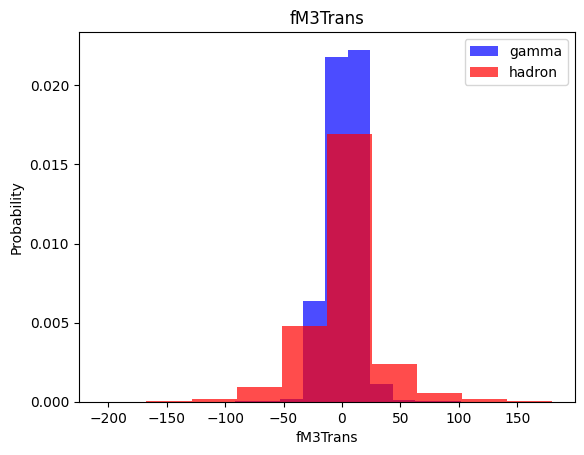

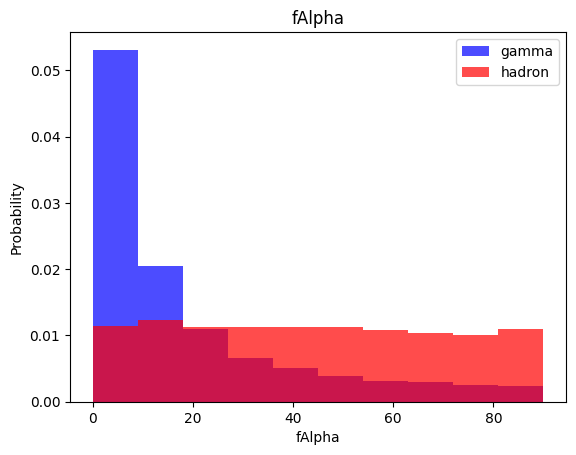

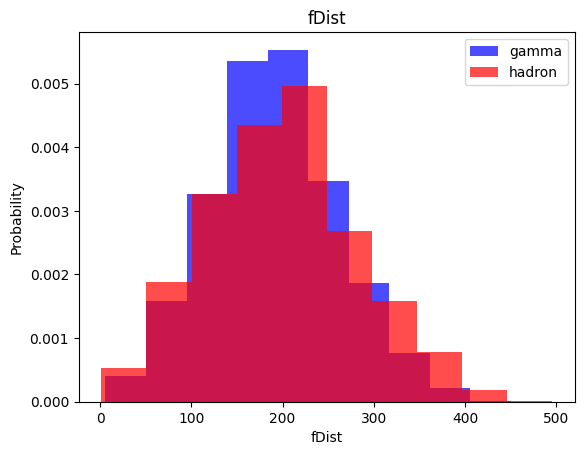

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color= 'blue', label = 'gamma', alpha = 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color= 'red', label = 'hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, Validation, Test Datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y, (-1,1))))

  return data,x,y

In [ ]:
train, x_train, y_train = scale_dataset(train,oversample=True)
vaild, x_valid, y_valid = scale_dataset(valid,oversample=False)
test, x_test, y_test = scale_dataset(test,oversample=False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
y_test

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1365
           1       0.85      0.86      0.86      2439

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51      1365
           1       0.73      0.91      0.81      2439

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1365
           1       0.83      0.82      0.83      2439

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1365
           1       0.89      0.89      0.89      2439

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [ ]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(
    x_train , y_train , epochs=epochs , batch_size=batch_size , validation_split=0.2,
  )

  return nn_model,history

16 nodes, dropout 0, learning rate 0.01, batch size 32, 100 epochs


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8071 - loss: 0.4228 - val_accuracy: 0.7980 - val_loss: 0.3902
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8555 - loss: 0.3329 - val_accuracy: 0.8040 - val_loss: 0.3937
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8567 - loss: 0.3410 - val_accuracy: 0.7445 - val_loss: 0.4630
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.3279 - val_accuracy: 0.7788 - val_loss: 0.4001
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.3241 - val_accuracy: 0.7509 - val_loss: 0.5050
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8680 - loss: 0.3238 - val_accuracy: 0.7217 - val_loss: 0.5409
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8644 - loss: 0.3255 - val_accuracy: 0.7798 - val_loss: 0.4333
Epoch 8/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8677 - loss: 0.3085 - val_accu

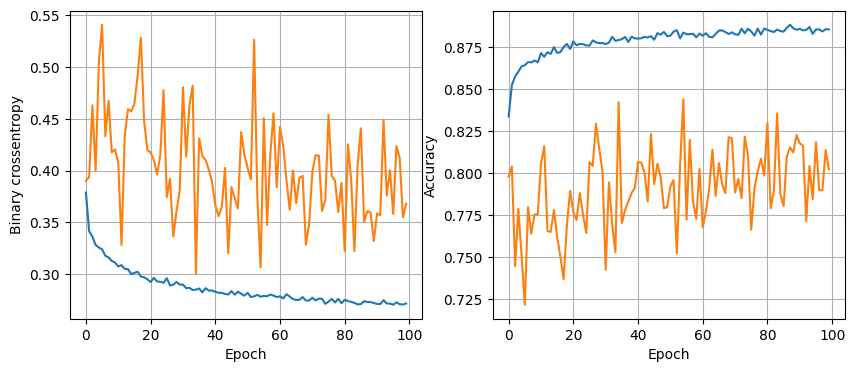

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3299
16 nodes, dropout 0, learning rate 0.01, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7832 - loss: 0.4649 - val_accuracy: 0.6746 - val_loss: 0.5630
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.3667 - val_accuracy: 0.7099 - val_loss: 0.5372
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8556 - loss: 0.3432 - val_accuracy: 0.7654 - val_loss: 0.4531
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3302 - val_accuracy: 0.7506 - val_loss: 0.4591
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8615 - loss: 0.3232 - val_accuracy: 0.7405 - val_loss: 0.4559
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3153 - val_accuracy: 0.7213 - val_loss: 0.5656
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8610 - loss: 0.32

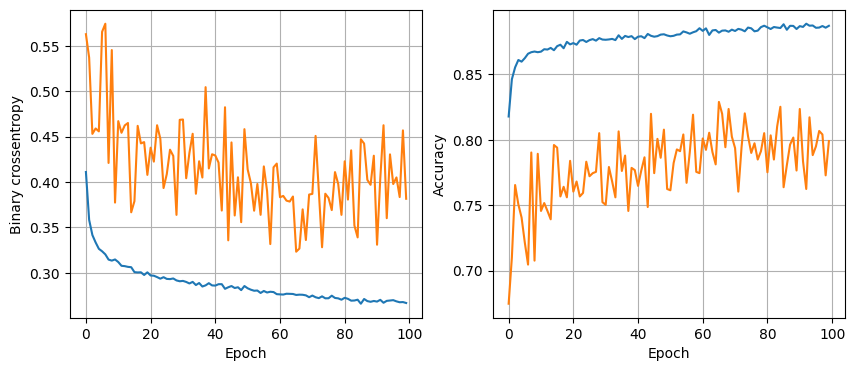

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3359
16 nodes, dropout 0, learning rate 0.01, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7705 - loss: 0.4862 - val_accuracy: 0.7415 - val_loss: 0.5072
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8440 - loss: 0.3636 - val_accuracy: 0.7765 - val_loss: 0.4513
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8479 - loss: 0.3436 - val_accuracy: 0.7560 - val_loss: 0.4837
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3329 - val_accuracy: 0.7785 - val_loss: 0.3929
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3325 - val_accuracy: 0.7496 - val_loss: 0.4934
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3123 - val_accuracy: 0.7408 - val_loss: 0.4748
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8627 - loss: 0.3182 - val_accu

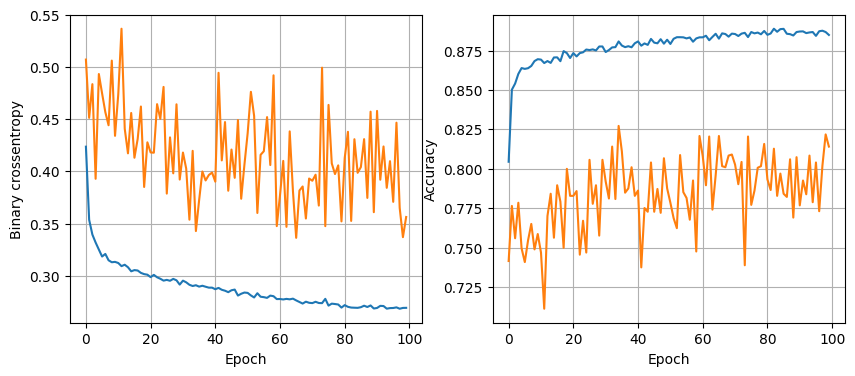

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3388
16 nodes, dropout 0, learning rate 0.001, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7230 - loss: 0.5841 - val_accuracy: 0.6208 - val_loss: 0.5997
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8162 - loss: 0.4018 - val_accuracy: 0.6743 - val_loss: 0.5653
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8295 - loss: 0.3817 - val_accuracy: 0.7250 - val_loss: 0.5149
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8396 - loss: 0.3660 - val_accuracy: 0.7271 - val_loss: 0.5057
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8461 - loss: 0.3605 - val_accuracy: 0.7304 - val_loss: 0.5221
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8492 - loss: 0.3425 - val_accuracy: 0.7738 - val_loss: 0.4500
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.3

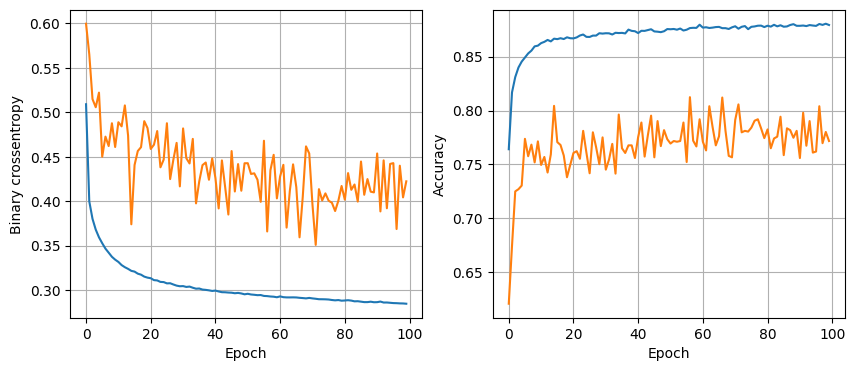

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8680 - loss: 0.3222
16 nodes, dropout 0, learning rate 0.001, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6601 - loss: 0.6284 - val_accuracy: 0.6531 - val_loss: 0.6051
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.4219 - val_accuracy: 0.6961 - val_loss: 0.5545
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.3952 - val_accuracy: 0.7385 - val_loss: 0.5019
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8360 - loss: 0.3724 - val_accuracy: 0.7187 - val_loss: 0.5507
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8399 - loss: 0.3721 - val_accuracy: 0.7365 - val_loss: 0.5190
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.3488 - val_accuracy: 0.7432 - val_loss: 0.5053
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.3

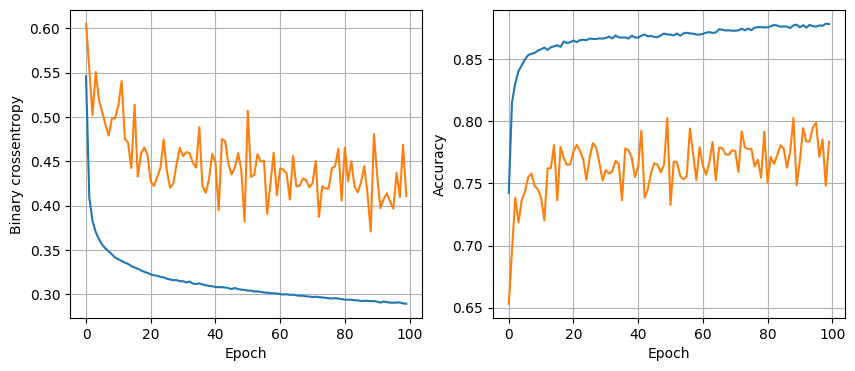

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8686 - loss: 0.3273
16 nodes, dropout 0, learning rate 0.001, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7021 - loss: 0.6359 - val_accuracy: 0.6175 - val_loss: 0.6333
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4803 - val_accuracy: 0.6255 - val_loss: 0.6338
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8056 - loss: 0.4338 - val_accuracy: 0.6440 - val_loss: 0.5986
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8095 - loss: 0.4152 - val_accuracy: 0.6561 - val_loss: 0.5866
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8193 - loss: 0.4053 - val_accuracy: 0.6941 - val_loss: 0.5283
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8291 - loss: 0.3888 - val_accuracy: 0.6911 - val_loss: 0.5501
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8423 - loss: 0.3681 - val_acc

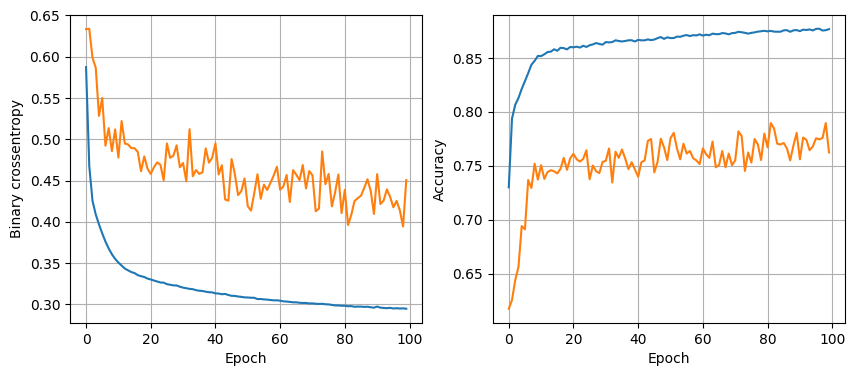

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.3333
16 nodes, dropout 0, learning rate 0.005, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7891 - loss: 0.4597 - val_accuracy: 0.7771 - val_loss: 0.4266
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8518 - loss: 0.3469 - val_accuracy: 0.7627 - val_loss: 0.4673
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8556 - loss: 0.3374 - val_accuracy: 0.7748 - val_loss: 0.4237
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8614 - loss: 0.3349 - val_accuracy: 0.7751 - val_loss: 0.4504
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 0.3254 - val_accuracy: 0.7415 - val_loss: 0.4957
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8696 - loss: 0.3080 - val_accuracy: 0.7486 - val_loss: 0.4712
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8677 - loss: 0.3

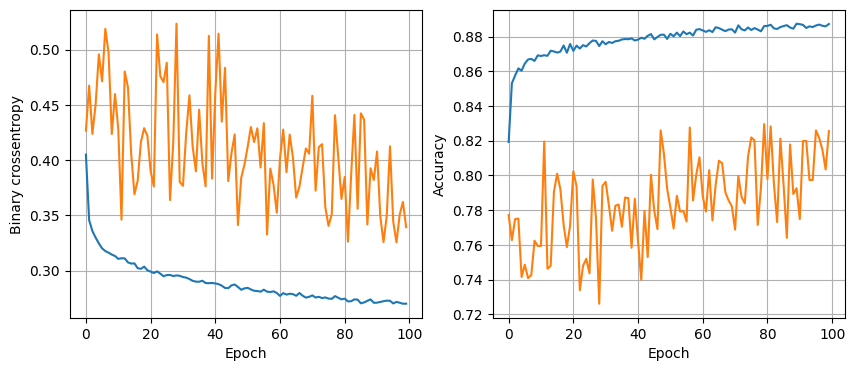

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.3551
16 nodes, dropout 0, learning rate 0.005, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7578 - loss: 0.5018 - val_accuracy: 0.7445 - val_loss: 0.5251
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8435 - loss: 0.3629 - val_accuracy: 0.7966 - val_loss: 0.4028
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8578 - loss: 0.3392 - val_accuracy: 0.7795 - val_loss: 0.4383
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8572 - loss: 0.3347 - val_accuracy: 0.7832 - val_loss: 0.4364
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 0.3289 - val_accuracy: 0.7909 - val_loss: 0.4108
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3251 - val_accuracy: 0.7523 - val_loss: 0.4798
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8670 - loss: 0.3

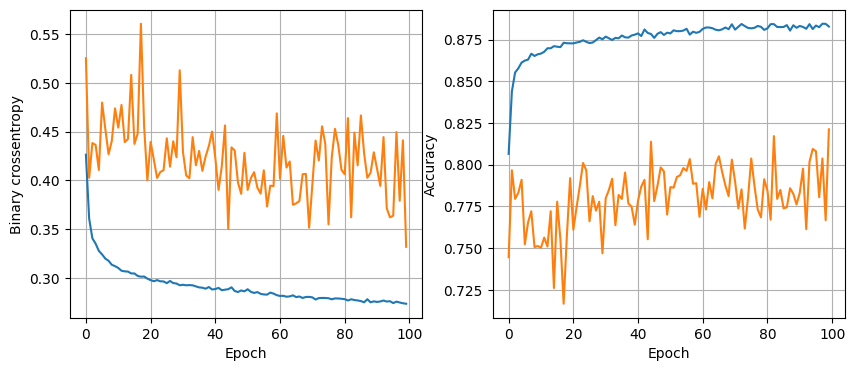

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3456
16 nodes, dropout 0, learning rate 0.005, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6887 - loss: 0.5528 - val_accuracy: 0.6716 - val_loss: 0.5621
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8303 - loss: 0.3818 - val_accuracy: 0.7257 - val_loss: 0.5218
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8430 - loss: 0.3658 - val_accuracy: 0.7734 - val_loss: 0.4556
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8523 - loss: 0.3479 - val_accuracy: 0.7812 - val_loss: 0.4357
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8434 - loss: 0.3482 - val_accuracy: 0.7089 - val_loss: 0.5622
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8448 - loss: 0.3496 - val_accuracy: 0.7123 - val_loss: 0.5598
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8589 - loss: 0.3287 - val_acc

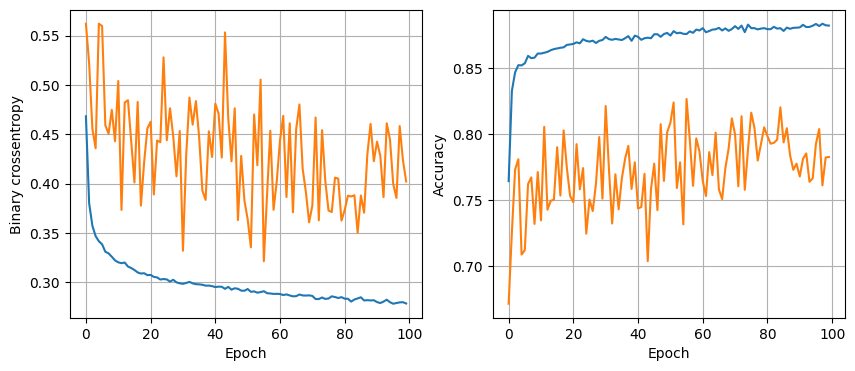

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8717 - loss: 0.3238
16 nodes, dropout 0.2, learning rate 0.01, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7518 - loss: 0.5059 - val_accuracy: 0.5879 - val_loss: 0.7069
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8261 - loss: 0.3984 - val_accuracy: 0.6561 - val_loss: 0.5883
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8399 - loss: 0.3785 - val_accuracy: 0.7738 - val_loss: 0.4332
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8424 - loss: 0.3723 - val_accuracy: 0.7358 - val_loss: 0.5321
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8462 - loss: 0.3652 - val_accuracy: 0.6763 - val_loss: 0.5937
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8516 - loss: 0.3521 - val_accuracy: 0.7284 - val_loss: 0.4336
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8469 - loss: 0.

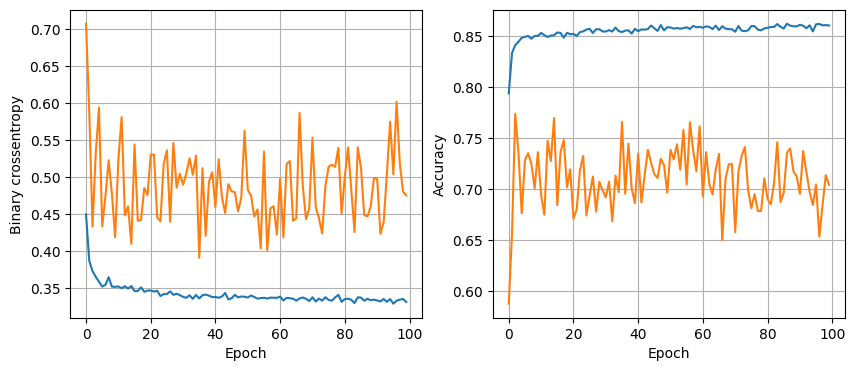

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.3274
16 nodes, dropout 0.2, learning rate 0.01, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7134 - loss: 0.5364 - val_accuracy: 0.6955 - val_loss: 0.5645
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8199 - loss: 0.4091 - val_accuracy: 0.7499 - val_loss: 0.4809
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8413 - loss: 0.3793 - val_accuracy: 0.7439 - val_loss: 0.4711
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8442 - loss: 0.3713 - val_accuracy: 0.7392 - val_loss: 0.4704
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8376 - loss: 0.3725 - val_accuracy: 0.7250 - val_loss: 0.4640
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8456 - loss: 0.3622 - val_accuracy: 0.7550 - val_loss: 0.4076
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8521 - loss: 0.

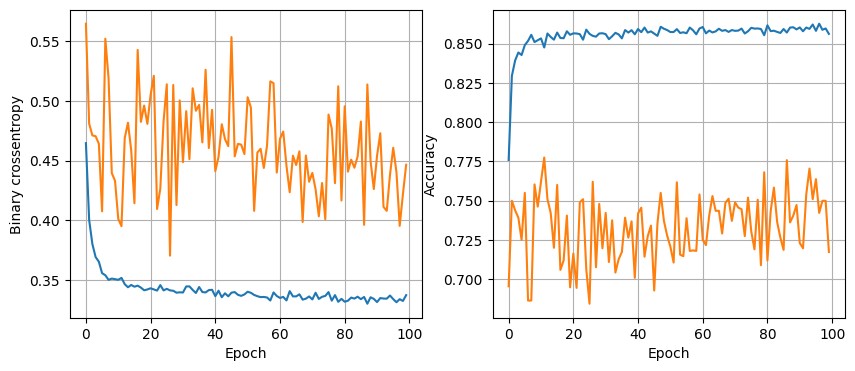

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3394
16 nodes, dropout 0.2, learning rate 0.01, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7471 - loss: 0.5225 - val_accuracy: 0.6982 - val_loss: 0.5403
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8309 - loss: 0.3996 - val_accuracy: 0.6639 - val_loss: 0.5990
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8390 - loss: 0.3801 - val_accuracy: 0.7405 - val_loss: 0.4664
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8423 - loss: 0.3697 - val_accuracy: 0.7045 - val_loss: 0.5229
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8464 - loss: 0.3524 - val_accuracy: 0.7190 - val_loss: 0.4870
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 0.3491 - val_accuracy: 0.7382 - val_loss: 0.4628
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8448 - loss: 0.3557 - val_ac

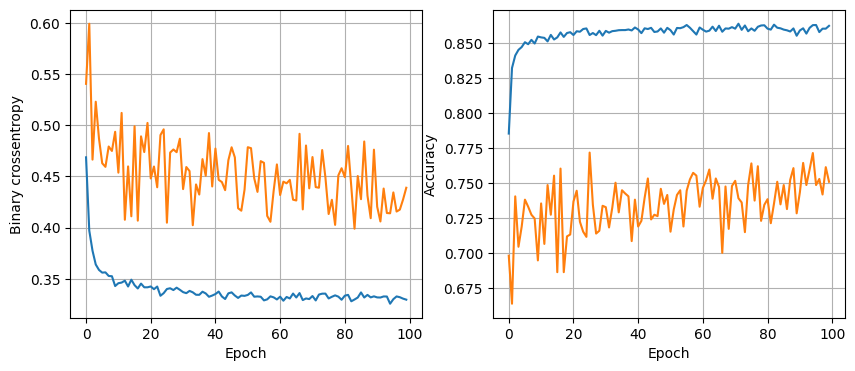

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8628 - loss: 0.3272
16 nodes, dropout 0.2, learning rate 0.001, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6230 - loss: 0.6464 - val_accuracy: 0.6602 - val_loss: 0.5753
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7930 - loss: 0.4531 - val_accuracy: 0.6703 - val_loss: 0.5729
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8094 - loss: 0.4336 - val_accuracy: 0.7012 - val_loss: 0.5455
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8211 - loss: 0.4070 - val_accuracy: 0.7294 - val_loss: 0.5198
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8282 - loss: 0.3980 - val_accuracy: 0.6618 - val_loss: 0.6126
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8349 - loss: 0.3870 - val_accuracy: 0.7294 - val_loss: 0.5064
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8504 - loss: 0

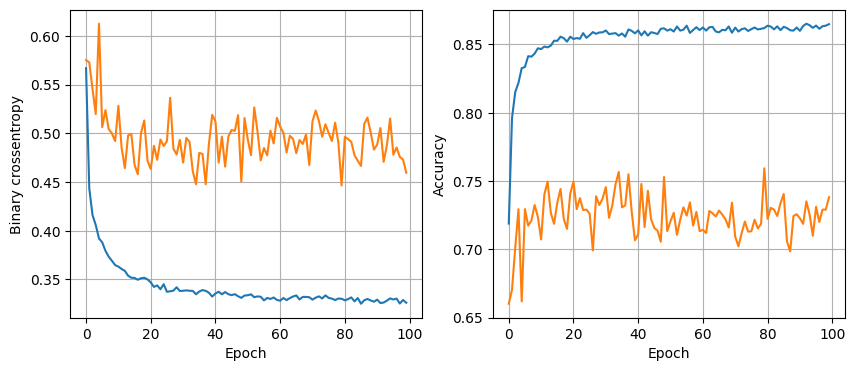

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8662 - loss: 0.3268
16 nodes, dropout 0.2, learning rate 0.001, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6508 - loss: 0.6432 - val_accuracy: 0.5976 - val_loss: 0.6704
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7786 - loss: 0.4736 - val_accuracy: 0.6457 - val_loss: 0.6018
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7969 - loss: 0.4413 - val_accuracy: 0.6612 - val_loss: 0.5881
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7995 - loss: 0.4305 - val_accuracy: 0.6820 - val_loss: 0.5619
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8085 - loss: 0.4198 - val_accuracy: 0.6837 - val_loss: 0.5479
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8105 - loss: 0.4200 - val_accuracy: 0.6992 - val_loss: 0.5244
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8257 - loss: 0

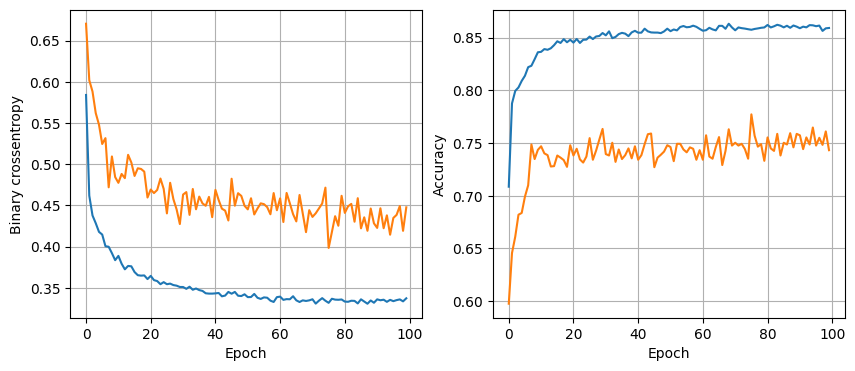

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.3330
16 nodes, dropout 0.2, learning rate 0.001, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5782 - loss: 0.6829 - val_accuracy: 0.5287 - val_loss: 0.6933
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7532 - loss: 0.5337 - val_accuracy: 0.5886 - val_loss: 0.6605
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7857 - loss: 0.4606 - val_accuracy: 0.6326 - val_loss: 0.6212
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7909 - loss: 0.4485 - val_accuracy: 0.6306 - val_loss: 0.6303
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7930 - loss: 0.4403 - val_accuracy: 0.6746 - val_loss: 0.5818
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8067 - loss: 0.4277 - val_accuracy: 0.6874 - val_loss: 0.5640
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8116 - loss: 0.4272 - val_a

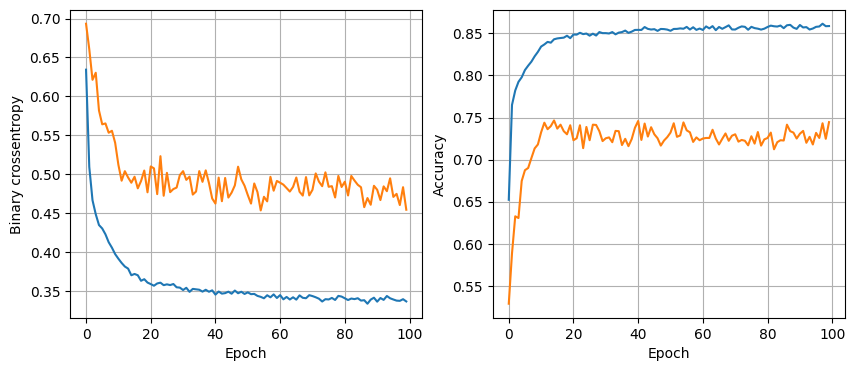

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3337
16 nodes, dropout 0.2, learning rate 0.005, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7451 - loss: 0.5108 - val_accuracy: 0.6642 - val_loss: 0.6426
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8279 - loss: 0.4010 - val_accuracy: 0.7287 - val_loss: 0.5370
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.3871 - val_accuracy: 0.7415 - val_loss: 0.4900
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8484 - loss: 0.3693 - val_accuracy: 0.7294 - val_loss: 0.4794
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 0.3629 - val_accuracy: 0.6941 - val_loss: 0.5440
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8476 - loss: 0.3561 - val_accuracy: 0.7516 - val_loss: 0.4412
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8420 - loss: 0

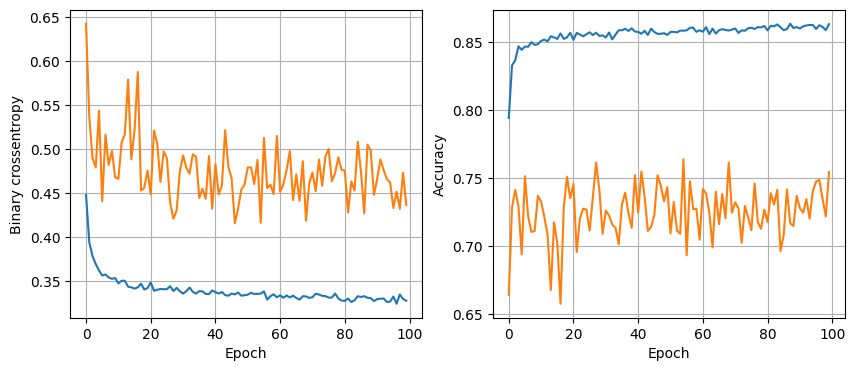

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3297
16 nodes, dropout 0.2, learning rate 0.005, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7282 - loss: 0.5297 - val_accuracy: 0.6622 - val_loss: 0.6067
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8216 - loss: 0.4075 - val_accuracy: 0.7392 - val_loss: 0.4657
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8377 - loss: 0.3920 - val_accuracy: 0.7321 - val_loss: 0.5011
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8400 - loss: 0.3743 - val_accuracy: 0.7624 - val_loss: 0.4363
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.3664 - val_accuracy: 0.7603 - val_loss: 0.4359
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8490 - loss: 0.3640 - val_accuracy: 0.7472 - val_loss: 0.4531
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8448 - loss: 0

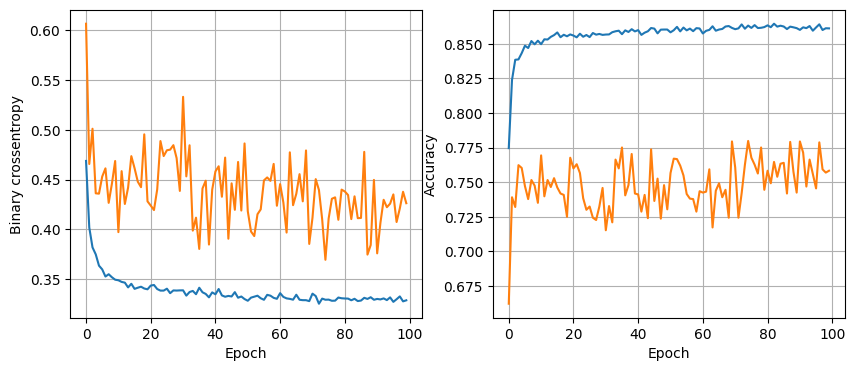

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3262
16 nodes, dropout 0.2, learning rate 0.005, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7083 - loss: 0.5500 - val_accuracy: 0.6242 - val_loss: 0.6162
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8001 - loss: 0.4364 - val_accuracy: 0.6918 - val_loss: 0.5435
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8145 - loss: 0.4141 - val_accuracy: 0.6632 - val_loss: 0.5945
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8218 - loss: 0.4087 - val_accuracy: 0.6787 - val_loss: 0.5564
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8352 - loss: 0.3867 - val_accuracy: 0.7176 - val_loss: 0.5249
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8412 - loss: 0.3754 - val_accuracy: 0.6978 - val_loss: 0.5626
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8458 - loss: 0.3634 - val_a

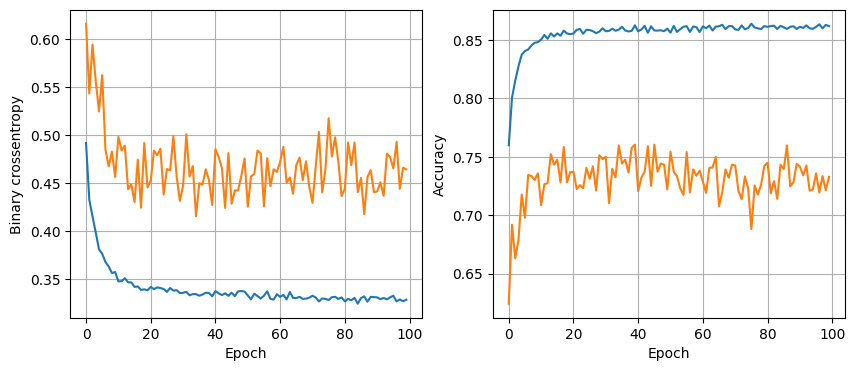

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.3221
32 nodes, dropout 0, learning rate 0.01, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7929 - loss: 0.4372 - val_accuracy: 0.7644 - val_loss: 0.4338
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.3399 - val_accuracy: 0.8390 - val_loss: 0.3287
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8596 - loss: 0.3318 - val_accuracy: 0.7328 - val_loss: 0.4831
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8647 - loss: 0.3225 - val_accuracy: 0.7072 - val_loss: 0.5144
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8665 - loss: 0.3203 - val_accuracy: 0.7560 - val_loss: 0.4690
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8635 - loss: 0.3223 - val_accuracy: 0.7563 - val_loss: 0.4254
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8656 - loss: 0.31

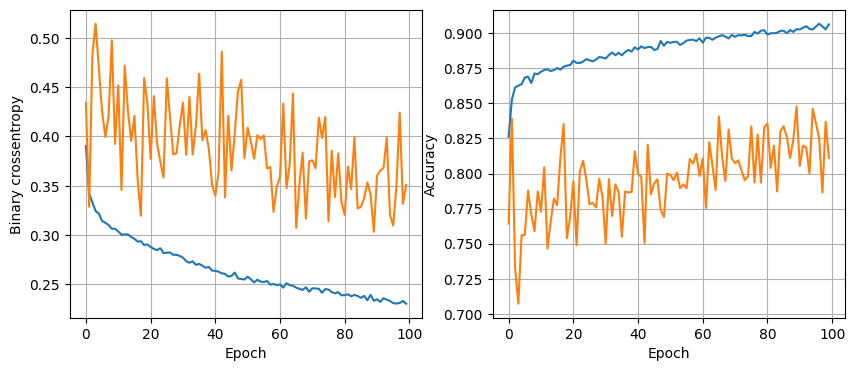

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3848
32 nodes, dropout 0, learning rate 0.01, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7874 - loss: 0.4460 - val_accuracy: 0.7308 - val_loss: 0.5510
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8595 - loss: 0.3442 - val_accuracy: 0.7523 - val_loss: 0.4779
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8546 - loss: 0.3346 - val_accuracy: 0.7593 - val_loss: 0.4392
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8692 - loss: 0.3198 - val_accuracy: 0.7812 - val_loss: 0.4303
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8674 - loss: 0.3140 - val_accuracy: 0.7539 - val_loss: 0.4568
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8642 - loss: 0.3158 - val_accuracy: 0.7862 - val_loss: 0.4032
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8733 - loss: 0.30

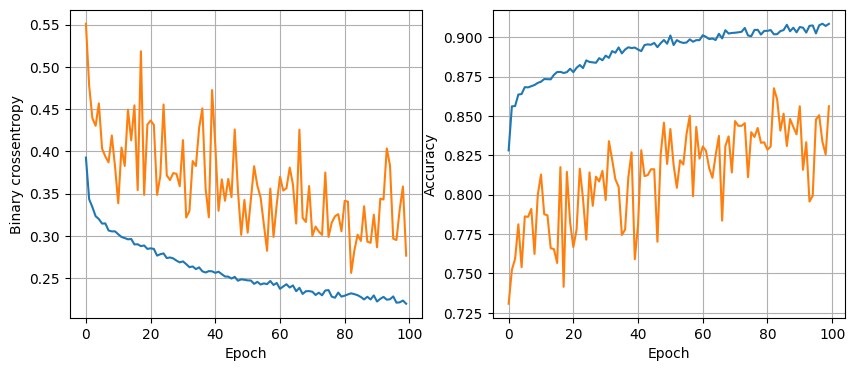

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.3936
32 nodes, dropout 0, learning rate 0.01, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7711 - loss: 0.4672 - val_accuracy: 0.6928 - val_loss: 0.5795
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8521 - loss: 0.3506 - val_accuracy: 0.7264 - val_loss: 0.5409
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.3269 - val_accuracy: 0.7496 - val_loss: 0.5043
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8646 - loss: 0.3218 - val_accuracy: 0.7691 - val_loss: 0.4402
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8680 - loss: 0.3125 - val_accuracy: 0.7734 - val_loss: 0.4534
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3057 - val_accuracy: 0.7657 - val_loss: 0.4346
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8676 - loss: 0.3095 - val_accu

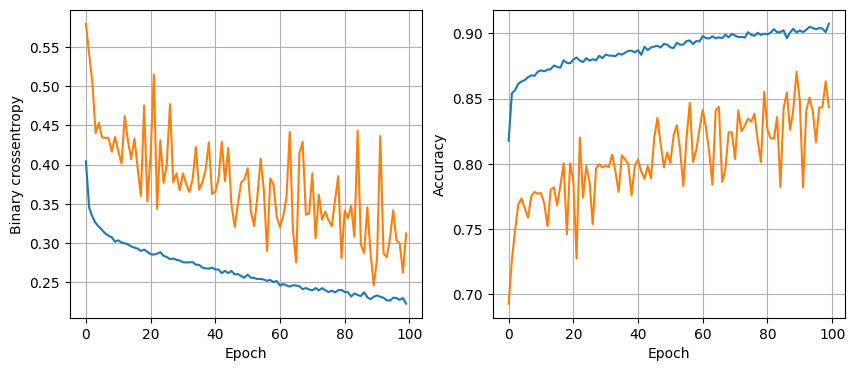

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.3796
32 nodes, dropout 0, learning rate 0.001, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7382 - loss: 0.5326 - val_accuracy: 0.6847 - val_loss: 0.5608
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8434 - loss: 0.3581 - val_accuracy: 0.7667 - val_loss: 0.4427
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8455 - loss: 0.3566 - val_accuracy: 0.7482 - val_loss: 0.5064
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.3391 - val_accuracy: 0.7842 - val_loss: 0.4357
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.3408 - val_accuracy: 0.7476 - val_loss: 0.4893
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8655 - loss: 0.3237 - val_accuracy: 0.7089 - val_loss: 0.5324
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8655 - loss: 0.3

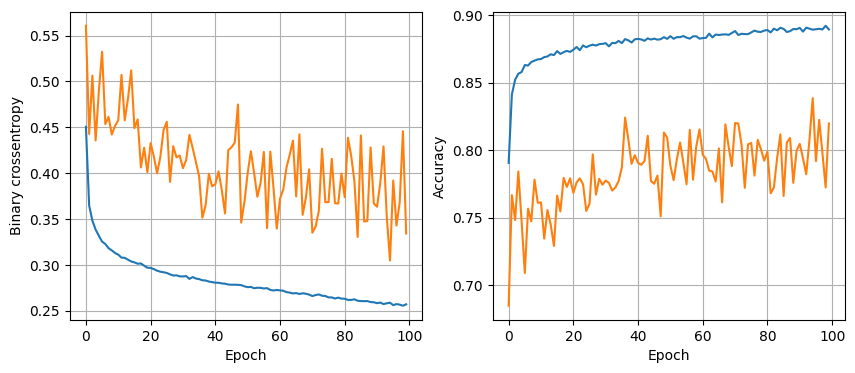

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3356
32 nodes, dropout 0, learning rate 0.001, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7268 - loss: 0.5509 - val_accuracy: 0.6820 - val_loss: 0.5475
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8247 - loss: 0.3888 - val_accuracy: 0.7455 - val_loss: 0.4821
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8460 - loss: 0.3681 - val_accuracy: 0.7889 - val_loss: 0.4283
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8512 - loss: 0.3446 - val_accuracy: 0.7563 - val_loss: 0.4820
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8584 - loss: 0.3417 - val_accuracy: 0.7422 - val_loss: 0.5046
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8602 - loss: 0.3343 - val_accuracy: 0.7613 - val_loss: 0.4742
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8609 - loss: 0.3

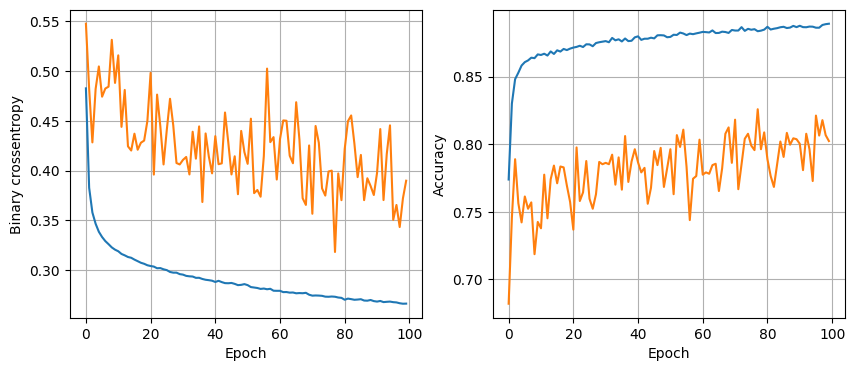

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3252
32 nodes, dropout 0, learning rate 0.001, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6195 - loss: 0.6493 - val_accuracy: 0.6474 - val_loss: 0.6415
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7989 - loss: 0.4389 - val_accuracy: 0.6756 - val_loss: 0.5728
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8287 - loss: 0.3858 - val_accuracy: 0.7583 - val_loss: 0.4697
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.3710 - val_accuracy: 0.7368 - val_loss: 0.5057
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8466 - loss: 0.3592 - val_accuracy: 0.7217 - val_loss: 0.5327
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8565 - loss: 0.3473 - val_accuracy: 0.7459 - val_loss: 0.5027
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8509 - loss: 0.3458 - val_acc

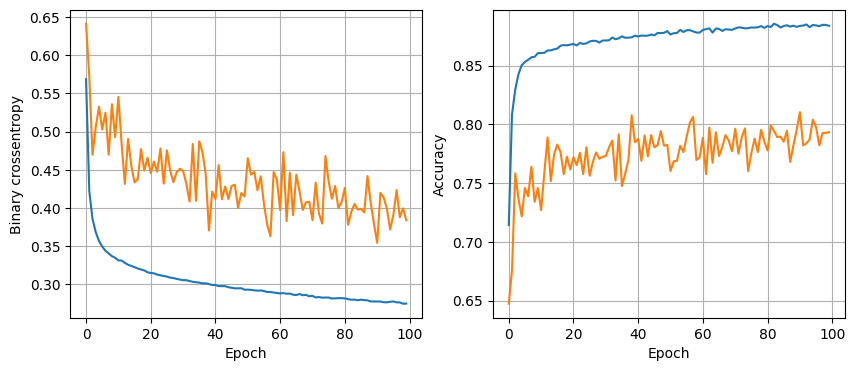

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3345
32 nodes, dropout 0, learning rate 0.005, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7953 - loss: 0.4356 - val_accuracy: 0.7697 - val_loss: 0.4455
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8497 - loss: 0.3476 - val_accuracy: 0.7576 - val_loss: 0.4592
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8637 - loss: 0.3249 - val_accuracy: 0.7499 - val_loss: 0.4664
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8637 - loss: 0.3213 - val_accuracy: 0.7849 - val_loss: 0.4310
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8683 - loss: 0.3141 - val_accuracy: 0.7486 - val_loss: 0.4530
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8729 - loss: 0.3102 - val_accuracy: 0.7617 - val_loss: 0.4320
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8741 - loss: 0.3

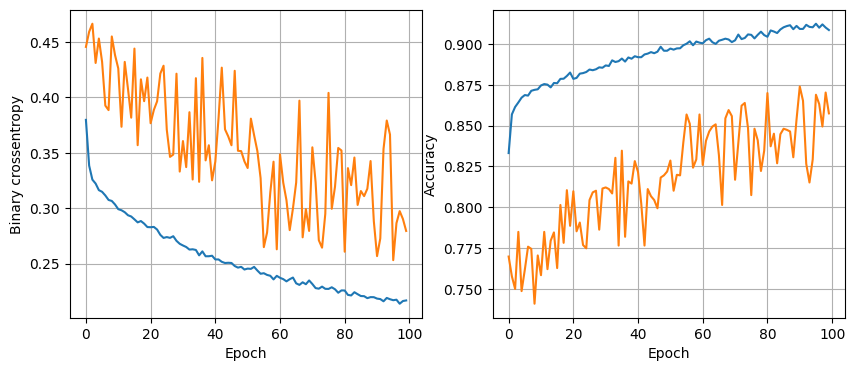

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.4090
32 nodes, dropout 0, learning rate 0.005, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7847 - loss: 0.4597 - val_accuracy: 0.7556 - val_loss: 0.4922
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8519 - loss: 0.3507 - val_accuracy: 0.7271 - val_loss: 0.5052
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8634 - loss: 0.3276 - val_accuracy: 0.7321 - val_loss: 0.4964
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8628 - loss: 0.3293 - val_accuracy: 0.7234 - val_loss: 0.5090
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3221 - val_accuracy: 0.7129 - val_loss: 0.5179
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8677 - loss: 0.3098 - val_accuracy: 0.7697 - val_loss: 0.4549
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8683 - loss: 0.3

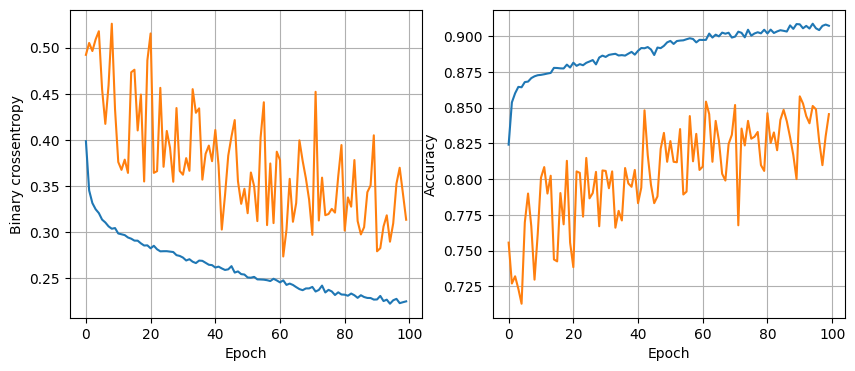

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3828
32 nodes, dropout 0, learning rate 0.005, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7485 - loss: 0.5052 - val_accuracy: 0.7334 - val_loss: 0.4665
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8412 - loss: 0.3627 - val_accuracy: 0.7183 - val_loss: 0.5346
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8533 - loss: 0.3490 - val_accuracy: 0.7835 - val_loss: 0.4143
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8647 - loss: 0.3345 - val_accuracy: 0.7469 - val_loss: 0.5048
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3296 - val_accuracy: 0.7909 - val_loss: 0.4062
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8669 - loss: 0.3176 - val_accuracy: 0.7839 - val_loss: 0.4104
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8650 - loss: 0.3140 - val_acc

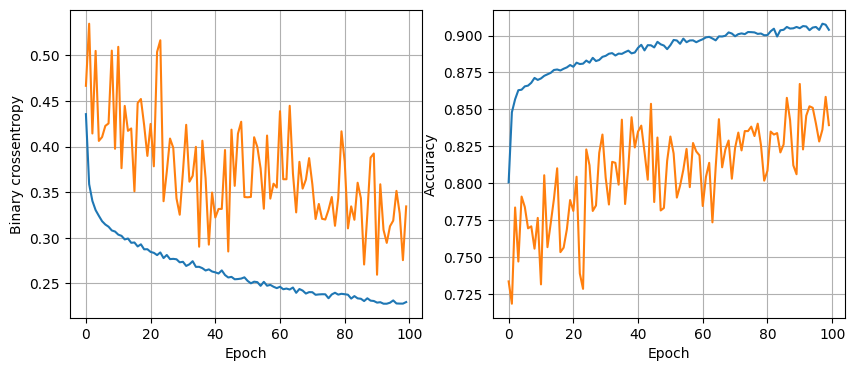

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3596
32 nodes, dropout 0.2, learning rate 0.01, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7778 - loss: 0.4638 - val_accuracy: 0.6975 - val_loss: 0.5629
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8451 - loss: 0.3688 - val_accuracy: 0.7392 - val_loss: 0.5068
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8506 - loss: 0.3545 - val_accuracy: 0.7459 - val_loss: 0.4388
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8507 - loss: 0.3516 - val_accuracy: 0.7408 - val_loss: 0.4289
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8544 - loss: 0.3496 - val_accuracy: 0.7449 - val_loss: 0.4428
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8542 - loss: 0.3472 - val_accuracy: 0.6904 - val_loss: 0.5148
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8588 - loss: 0.

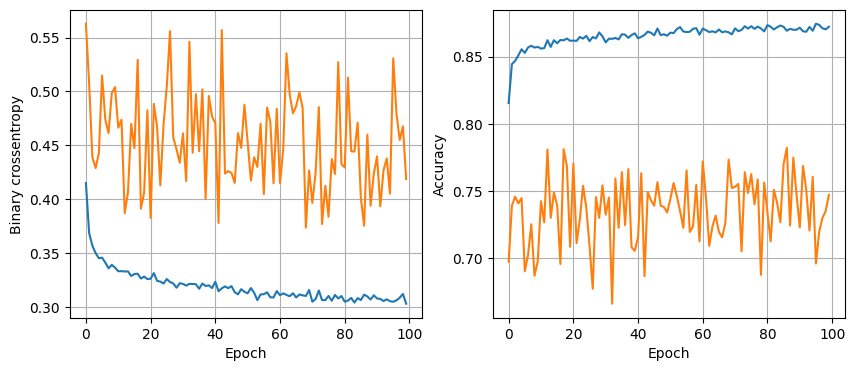

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8745 - loss: 0.3171
32 nodes, dropout 0.2, learning rate 0.01, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7736 - loss: 0.4733 - val_accuracy: 0.7190 - val_loss: 0.5418
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8412 - loss: 0.3807 - val_accuracy: 0.7553 - val_loss: 0.4650
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.3530 - val_accuracy: 0.6390 - val_loss: 0.7154
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8498 - loss: 0.3537 - val_accuracy: 0.7388 - val_loss: 0.4751
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8530 - loss: 0.3452 - val_accuracy: 0.7129 - val_loss: 0.5227
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8592 - loss: 0.3399 - val_accuracy: 0.7089 - val_loss: 0.4753
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8631 - loss: 0.

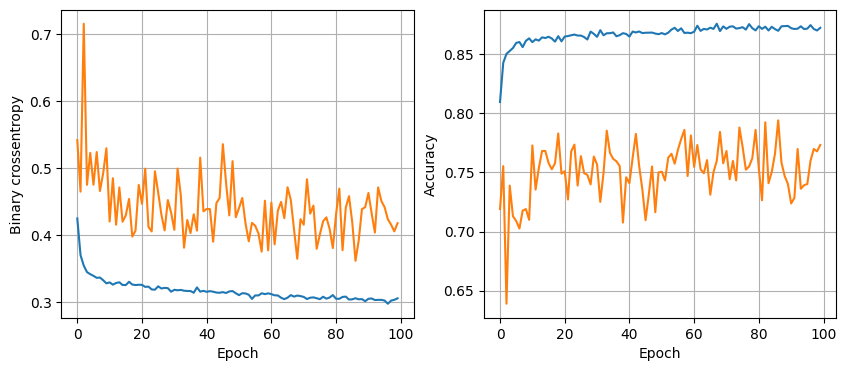

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8732 - loss: 0.3195
32 nodes, dropout 0.2, learning rate 0.01, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7606 - loss: 0.4983 - val_accuracy: 0.7489 - val_loss: 0.5107
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8398 - loss: 0.3857 - val_accuracy: 0.6817 - val_loss: 0.5705
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8442 - loss: 0.3627 - val_accuracy: 0.7721 - val_loss: 0.4193
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8477 - loss: 0.3531 - val_accuracy: 0.6988 - val_loss: 0.5604
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8539 - loss: 0.3459 - val_accuracy: 0.7550 - val_loss: 0.4254
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8601 - loss: 0.3334 - val_accuracy: 0.7106 - val_loss: 0.5118
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8658 - loss: 0.3251 - val_ac

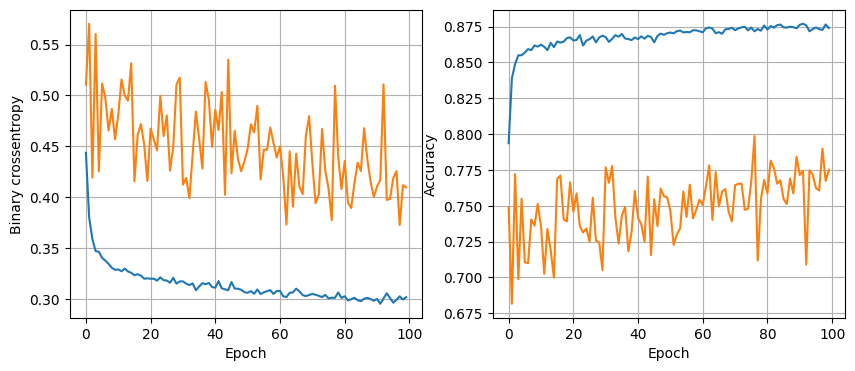

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.3205
32 nodes, dropout 0.2, learning rate 0.001, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7126 - loss: 0.5731 - val_accuracy: 0.6266 - val_loss: 0.6009
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8012 - loss: 0.4237 - val_accuracy: 0.6672 - val_loss: 0.5663
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8204 - loss: 0.4029 - val_accuracy: 0.7274 - val_loss: 0.5303
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 0.3902 - val_accuracy: 0.6934 - val_loss: 0.5724
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8416 - loss: 0.3733 - val_accuracy: 0.7734 - val_loss: 0.4420
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8435 - loss: 0.3750 - val_accuracy: 0.7506 - val_loss: 0.4869
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8480 - loss: 0

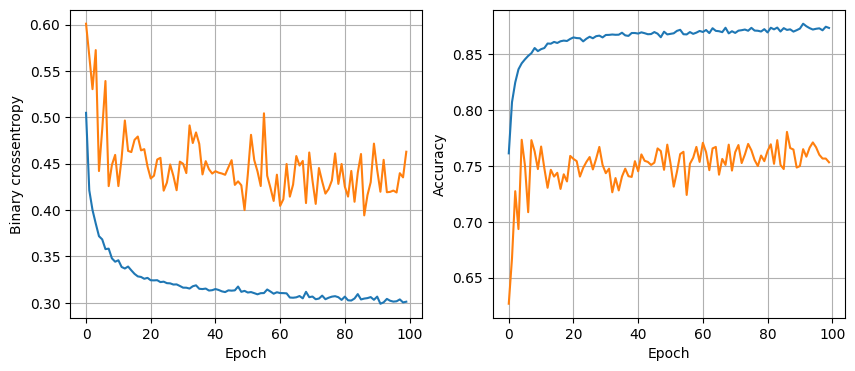

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.3165
32 nodes, dropout 0.2, learning rate 0.001, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6535 - loss: 0.6002 - val_accuracy: 0.6108 - val_loss: 0.6436
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8014 - loss: 0.4326 - val_accuracy: 0.6914 - val_loss: 0.5359
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8097 - loss: 0.4236 - val_accuracy: 0.6615 - val_loss: 0.5889
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8191 - loss: 0.3998 - val_accuracy: 0.7193 - val_loss: 0.5127
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8243 - loss: 0.3966 - val_accuracy: 0.7109 - val_loss: 0.5377
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8373 - loss: 0.3772 - val_accuracy: 0.7183 - val_loss: 0.5166
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8407 - loss: 0

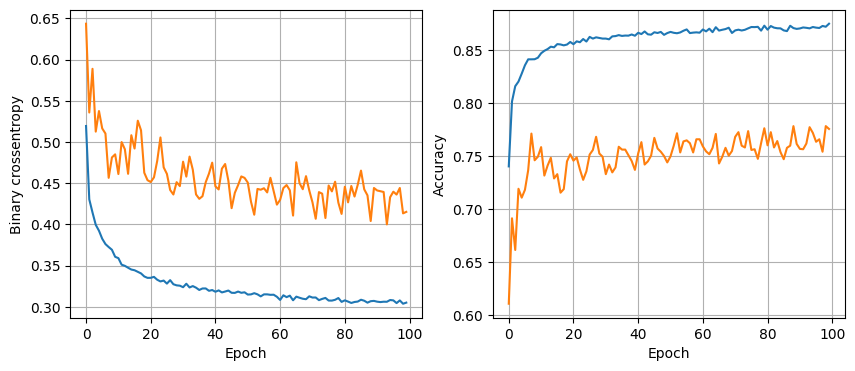

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3174
32 nodes, dropout 0.2, learning rate 0.001, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6495 - loss: 0.6225 - val_accuracy: 0.6205 - val_loss: 0.6047
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7941 - loss: 0.4531 - val_accuracy: 0.6494 - val_loss: 0.5894
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7995 - loss: 0.4393 - val_accuracy: 0.6541 - val_loss: 0.6109
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8153 - loss: 0.4170 - val_accuracy: 0.7035 - val_loss: 0.5340
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8156 - loss: 0.4092 - val_accuracy: 0.7113 - val_loss: 0.5139
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8311 - loss: 0.3952 - val_accuracy: 0.7274 - val_loss: 0.5167
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8294 - loss: 0.4028 - val_a

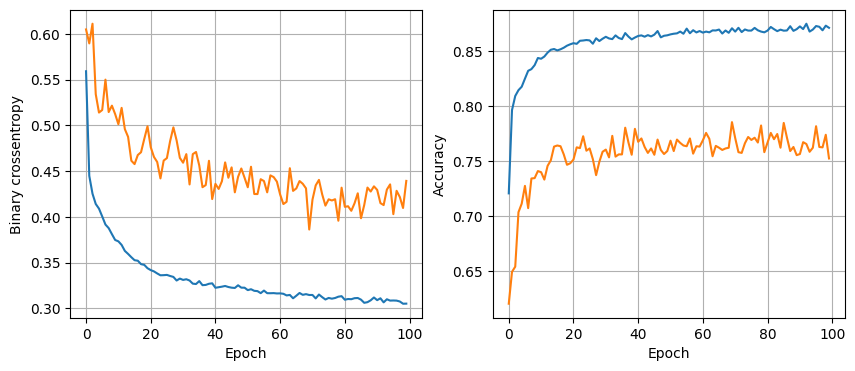

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.3157
32 nodes, dropout 0.2, learning rate 0.005, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7541 - loss: 0.4855 - val_accuracy: 0.7503 - val_loss: 0.4386
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8366 - loss: 0.3831 - val_accuracy: 0.6951 - val_loss: 0.5221
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8523 - loss: 0.3590 - val_accuracy: 0.7240 - val_loss: 0.5058
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8523 - loss: 0.3450 - val_accuracy: 0.7187 - val_loss: 0.5177
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8499 - loss: 0.3536 - val_accuracy: 0.7271 - val_loss: 0.4693
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8521 - loss: 0.3451 - val_accuracy: 0.6850 - val_loss: 0.5418
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8613 - loss: 0

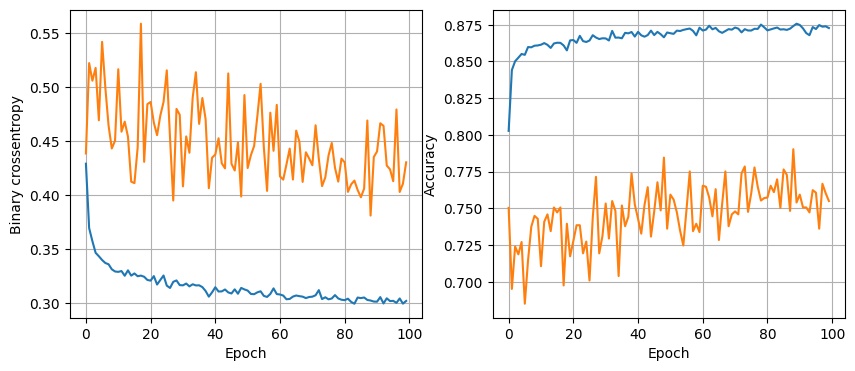

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3239
32 nodes, dropout 0.2, learning rate 0.005, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7574 - loss: 0.5057 - val_accuracy: 0.7103 - val_loss: 0.5263
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8337 - loss: 0.3920 - val_accuracy: 0.6867 - val_loss: 0.5921
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3613 - val_accuracy: 0.7681 - val_loss: 0.4418
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8479 - loss: 0.3602 - val_accuracy: 0.6978 - val_loss: 0.5291
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8517 - loss: 0.3408 - val_accuracy: 0.7587 - val_loss: 0.4408
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8587 - loss: 0.3389 - val_accuracy: 0.7627 - val_loss: 0.4475
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8570 - loss: 0

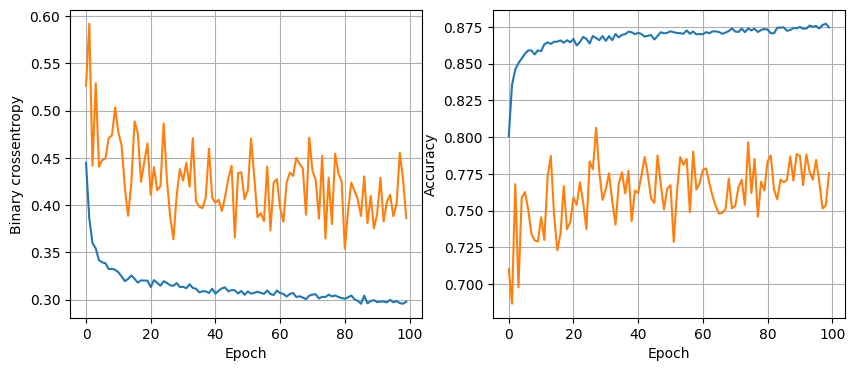

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.3110
32 nodes, dropout 0.2, learning rate 0.005, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6919 - loss: 0.5620 - val_accuracy: 0.6571 - val_loss: 0.5636
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8256 - loss: 0.4050 - val_accuracy: 0.6961 - val_loss: 0.5574
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8407 - loss: 0.3770 - val_accuracy: 0.6955 - val_loss: 0.5637
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8458 - loss: 0.3651 - val_accuracy: 0.7297 - val_loss: 0.4880
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8565 - loss: 0.3490 - val_accuracy: 0.7745 - val_loss: 0.4300
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8479 - loss: 0.3544 - val_accuracy: 0.7711 - val_loss: 0.4558
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8500 - loss: 0.3552 - val_a

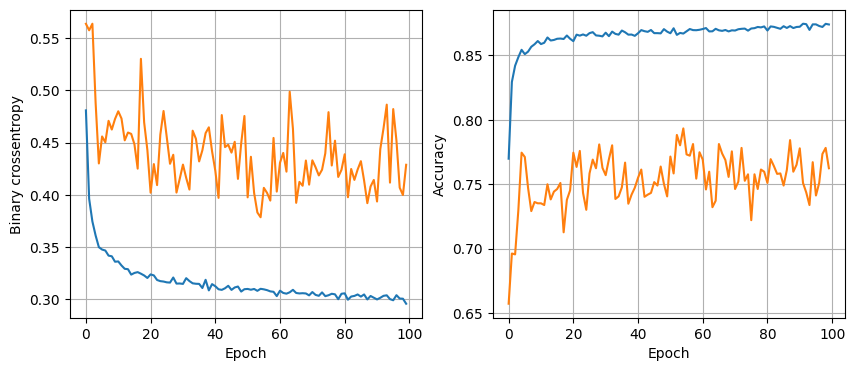

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3171
64 nodes, dropout 0, learning rate 0.01, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8011 - loss: 0.4353 - val_accuracy: 0.7553 - val_loss: 0.4826
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8543 - loss: 0.3386 - val_accuracy: 0.6770 - val_loss: 0.6193
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8652 - loss: 0.3177 - val_accuracy: 0.7334 - val_loss: 0.5256
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8608 - loss: 0.3257 - val_accuracy: 0.7311 - val_loss: 0.5047
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8626 - loss: 0.3212 - val_accuracy: 0.8578 - val_loss: 0.2524
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8654 - loss: 0.3252 - val_accuracy: 0.6753 - val_loss: 0.5815
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8714 - loss: 0.31

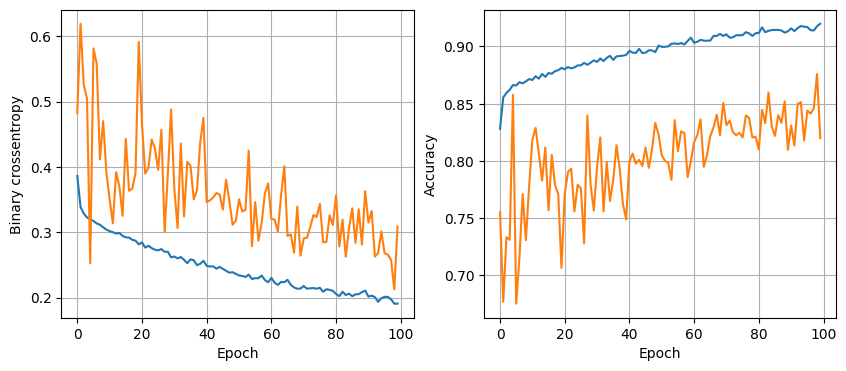

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8481 - loss: 0.5080
64 nodes, dropout 0, learning rate 0.01, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8146 - loss: 0.4173 - val_accuracy: 0.7798 - val_loss: 0.4118
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8511 - loss: 0.3508 - val_accuracy: 0.7714 - val_loss: 0.4567
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8623 - loss: 0.3228 - val_accuracy: 0.7607 - val_loss: 0.4028
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8599 - loss: 0.3244 - val_accuracy: 0.7573 - val_loss: 0.4369
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8676 - loss: 0.3152 - val_accuracy: 0.7301 - val_loss: 0.4958
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8713 - loss: 0.3029 - val_accuracy: 0.7889 - val_loss: 0.3667
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8703 - loss: 0.30

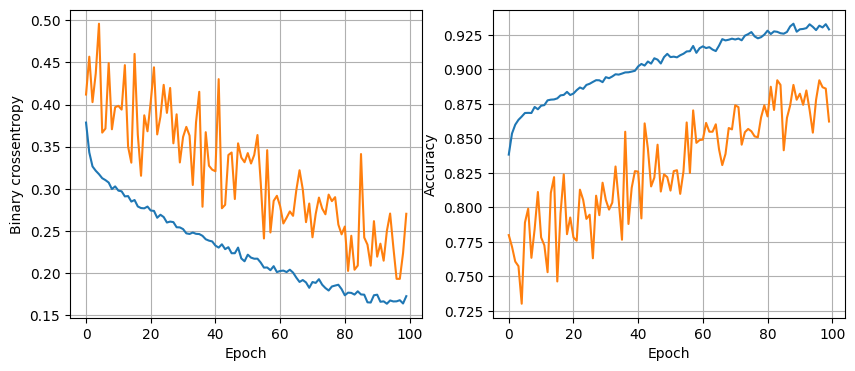

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.5981
64 nodes, dropout 0, learning rate 0.01, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8087 - loss: 0.4314 - val_accuracy: 0.7667 - val_loss: 0.4456
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8611 - loss: 0.3339 - val_accuracy: 0.7099 - val_loss: 0.5794
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8603 - loss: 0.3319 - val_accuracy: 0.7603 - val_loss: 0.4553
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8628 - loss: 0.3239 - val_accuracy: 0.7529 - val_loss: 0.4343
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8653 - loss: 0.3161 - val_accuracy: 0.7677 - val_loss: 0.4050
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8683 - loss: 0.3150 - val_accuracy: 0.7388 - val_loss: 0.5043
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8700 - loss: 0.3015 - val_accu

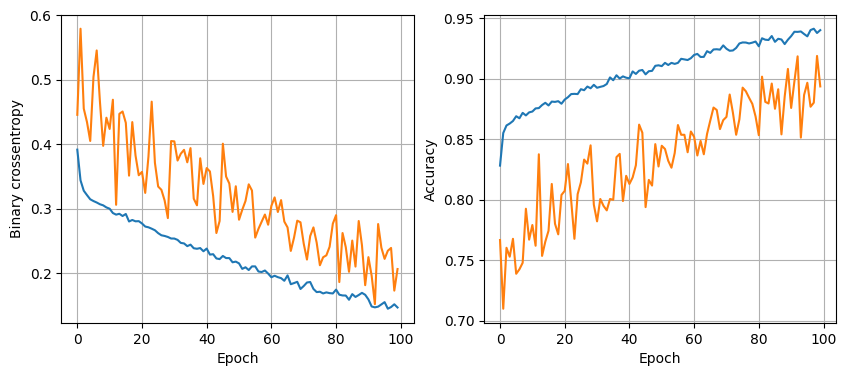

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8554 - loss: 0.6789
64 nodes, dropout 0, learning rate 0.001, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7531 - loss: 0.4933 - val_accuracy: 0.7691 - val_loss: 0.4507
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8459 - loss: 0.3655 - val_accuracy: 0.7815 - val_loss: 0.4425
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8591 - loss: 0.3386 - val_accuracy: 0.7398 - val_loss: 0.5074
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8603 - loss: 0.3351 - val_accuracy: 0.7731 - val_loss: 0.4458
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8565 - loss: 0.3263 - val_accuracy: 0.7872 - val_loss: 0.4362
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8699 - loss: 0.3174 - val_accuracy: 0.7829 - val_loss: 0.4302
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8613 - loss: 0.3

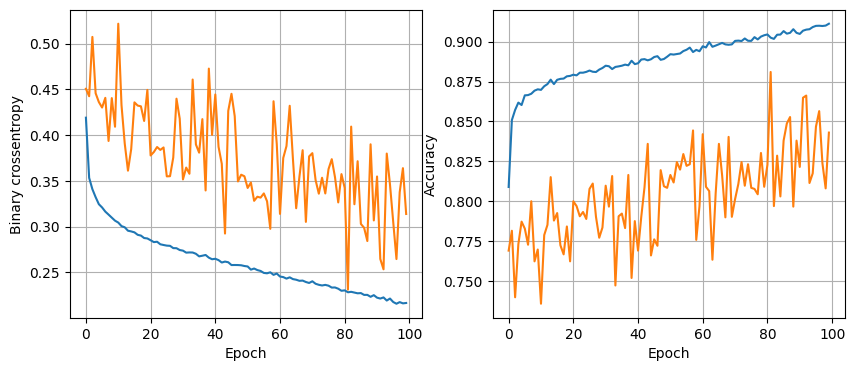

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.3727
64 nodes, dropout 0, learning rate 0.001, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7522 - loss: 0.5027 - val_accuracy: 0.6376 - val_loss: 0.6132
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8483 - loss: 0.3588 - val_accuracy: 0.7224 - val_loss: 0.5387
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3427 - val_accuracy: 0.8027 - val_loss: 0.3930
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8567 - loss: 0.3404 - val_accuracy: 0.7334 - val_loss: 0.5136
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8594 - loss: 0.3327 - val_accuracy: 0.7311 - val_loss: 0.5216
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8564 - loss: 0.3317 - val_accuracy: 0.7449 - val_loss: 0.4963
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8679 - loss: 0.3

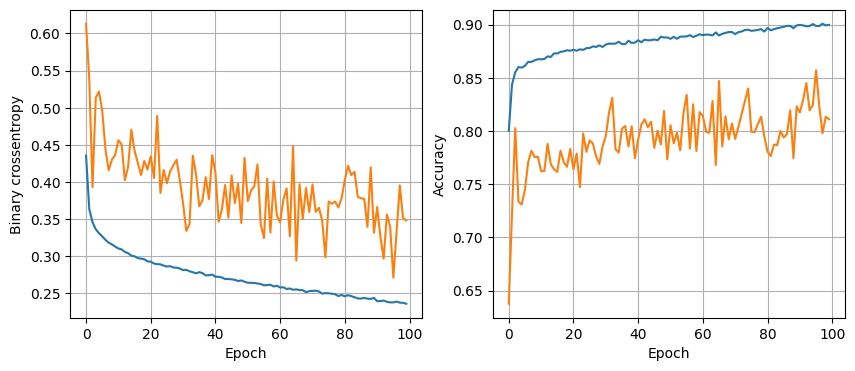

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3323
64 nodes, dropout 0, learning rate 0.001, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7628 - loss: 0.5496 - val_accuracy: 0.6669 - val_loss: 0.6010
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8208 - loss: 0.3909 - val_accuracy: 0.7459 - val_loss: 0.4905
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8477 - loss: 0.3585 - val_accuracy: 0.7597 - val_loss: 0.4759
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8588 - loss: 0.3386 - val_accuracy: 0.7348 - val_loss: 0.5202
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8523 - loss: 0.3490 - val_accuracy: 0.7708 - val_loss: 0.4577
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8603 - loss: 0.3303 - val_accuracy: 0.7429 - val_loss: 0.4983
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8661 - loss: 0.3223 - val_acc

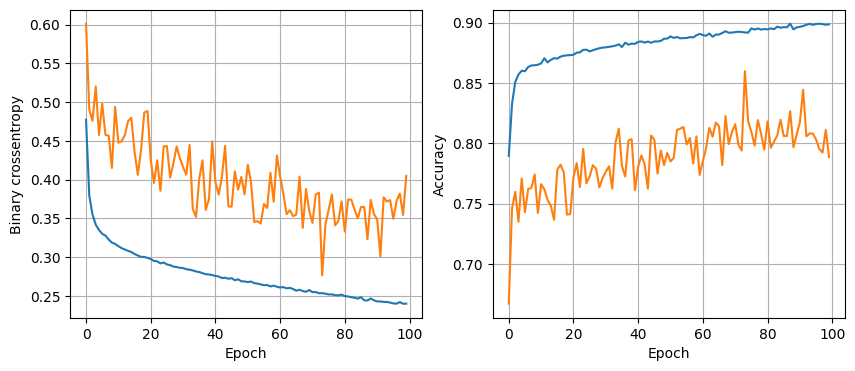

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3447
64 nodes, dropout 0, learning rate 0.005, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8060 - loss: 0.4252 - val_accuracy: 0.7546 - val_loss: 0.4534
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.3327 - val_accuracy: 0.7291 - val_loss: 0.4969
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8653 - loss: 0.3195 - val_accuracy: 0.7849 - val_loss: 0.3928
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.3173 - val_accuracy: 0.7469 - val_loss: 0.4655
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8622 - loss: 0.3191 - val_accuracy: 0.8007 - val_loss: 0.3601
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8724 - loss: 0.3063 - val_accuracy: 0.7482 - val_loss: 0.5055
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8675 - loss: 0.3

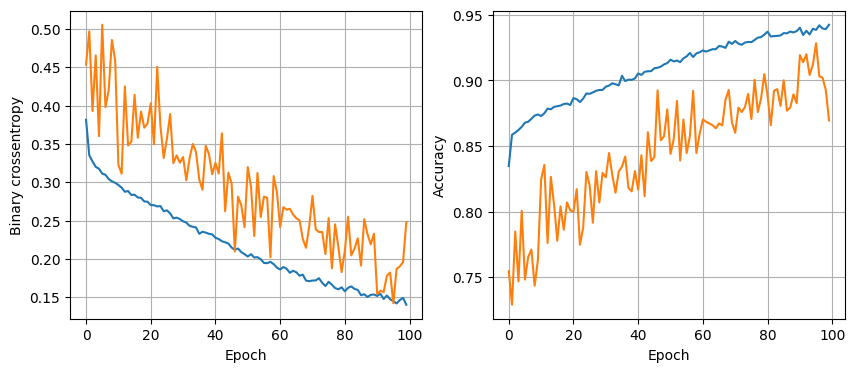

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.6243
64 nodes, dropout 0, learning rate 0.005, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8063 - loss: 0.4300 - val_accuracy: 0.7277 - val_loss: 0.5543
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8526 - loss: 0.3514 - val_accuracy: 0.7724 - val_loss: 0.4543
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8611 - loss: 0.3349 - val_accuracy: 0.7650 - val_loss: 0.4930
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8713 - loss: 0.3167 - val_accuracy: 0.7980 - val_loss: 0.3908
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8694 - loss: 0.3151 - val_accuracy: 0.7304 - val_loss: 0.5314
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.3119 - val_accuracy: 0.7681 - val_loss: 0.3886
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3

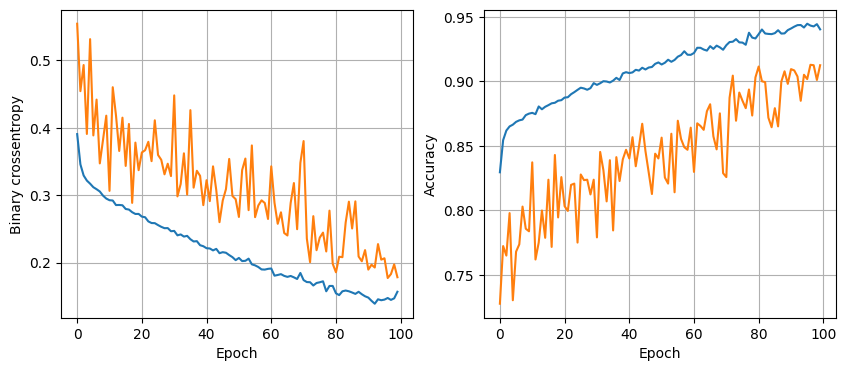

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.5906
64 nodes, dropout 0, learning rate 0.005, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7906 - loss: 0.4565 - val_accuracy: 0.7600 - val_loss: 0.4745
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8532 - loss: 0.3383 - val_accuracy: 0.7385 - val_loss: 0.4935
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8590 - loss: 0.3351 - val_accuracy: 0.7287 - val_loss: 0.5037
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8678 - loss: 0.3171 - val_accuracy: 0.7355 - val_loss: 0.4830
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8646 - loss: 0.3149 - val_accuracy: 0.7103 - val_loss: 0.5461
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8701 - loss: 0.3086 - val_accuracy: 0.7395 - val_loss: 0.4976
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8671 - loss: 0.3092 - val_acc

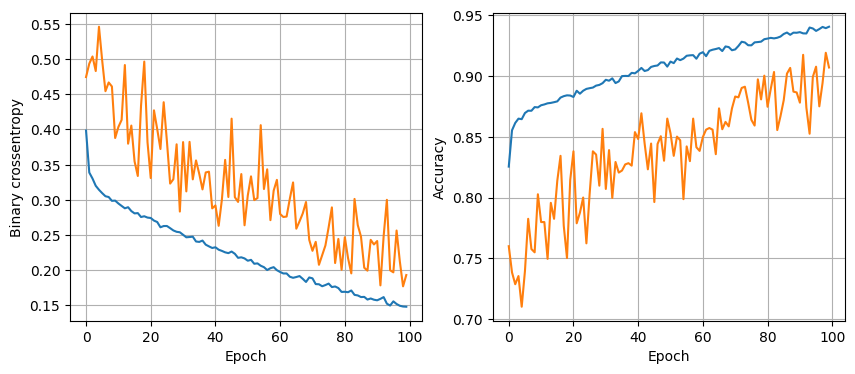

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.5147
64 nodes, dropout 0.2, learning rate 0.01, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8001 - loss: 0.4366 - val_accuracy: 0.7583 - val_loss: 0.4132
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8428 - loss: 0.3602 - val_accuracy: 0.7012 - val_loss: 0.5555
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8583 - loss: 0.3399 - val_accuracy: 0.7237 - val_loss: 0.4757
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8569 - loss: 0.3344 - val_accuracy: 0.7375 - val_loss: 0.4356
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8595 - loss: 0.3353 - val_accuracy: 0.7980 - val_loss: 0.3984
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8557 - loss: 0.3446 - val_accuracy: 0.7543 - val_loss: 0.4446
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8525 - loss: 0.

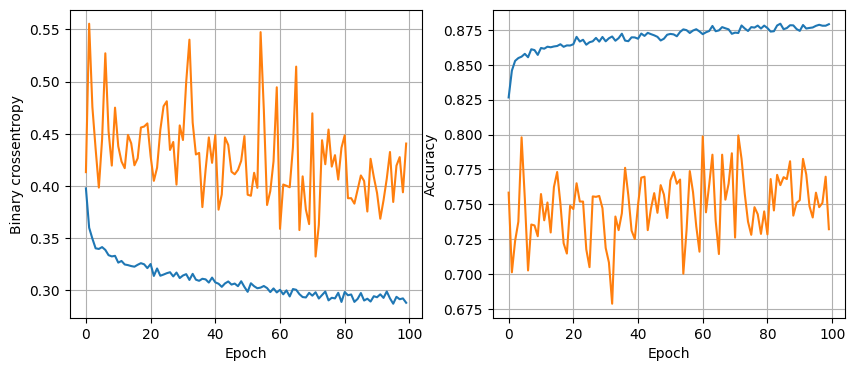

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8682 - loss: 0.3250
64 nodes, dropout 0.2, learning rate 0.01, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8056 - loss: 0.4321 - val_accuracy: 0.7119 - val_loss: 0.5309
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8474 - loss: 0.3693 - val_accuracy: 0.7513 - val_loss: 0.4676
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8537 - loss: 0.3521 - val_accuracy: 0.7516 - val_loss: 0.4300
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8499 - loss: 0.3517 - val_accuracy: 0.7435 - val_loss: 0.4498
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8576 - loss: 0.3405 - val_accuracy: 0.7627 - val_loss: 0.4757
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8546 - loss: 0.3368 - val_accuracy: 0.7197 - val_loss: 0.5094
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8592 - loss: 0.

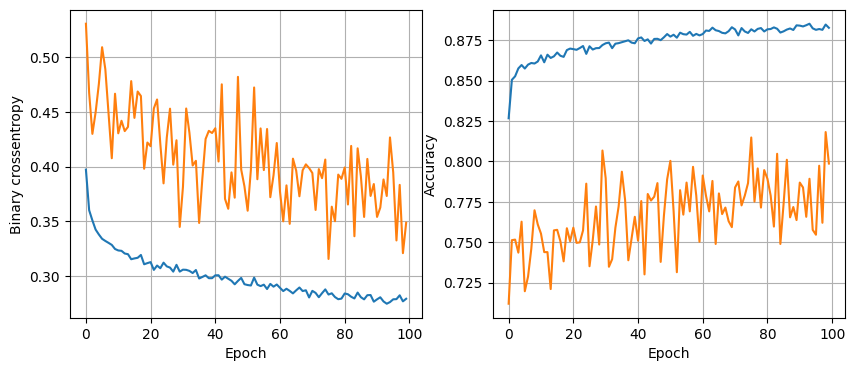

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8721 - loss: 0.3136
64 nodes, dropout 0.2, learning rate 0.01, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7829 - loss: 0.4627 - val_accuracy: 0.7257 - val_loss: 0.5127
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8531 - loss: 0.3567 - val_accuracy: 0.7506 - val_loss: 0.4580
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8494 - loss: 0.3529 - val_accuracy: 0.7200 - val_loss: 0.4747
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8593 - loss: 0.3359 - val_accuracy: 0.7334 - val_loss: 0.4370
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8546 - loss: 0.3374 - val_accuracy: 0.7916 - val_loss: 0.3961
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8660 - loss: 0.3234 - val_accuracy: 0.7082 - val_loss: 0.5146
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8604 - loss: 0.3285 - val_ac

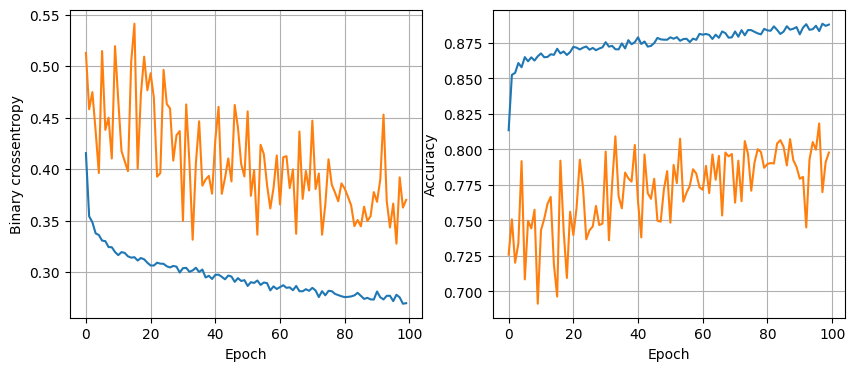

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3184
64 nodes, dropout 0.2, learning rate 0.001, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7169 - loss: 0.5332 - val_accuracy: 0.6874 - val_loss: 0.5493
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8293 - loss: 0.3929 - val_accuracy: 0.7385 - val_loss: 0.4987
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8346 - loss: 0.3747 - val_accuracy: 0.7345 - val_loss: 0.5105
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8532 - loss: 0.3532 - val_accuracy: 0.7365 - val_loss: 0.5115
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8553 - loss: 0.3385 - val_accuracy: 0.7328 - val_loss: 0.4941
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8551 - loss: 0.3445 - val_accuracy: 0.7778 - val_loss: 0.4377
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8600 - loss: 0

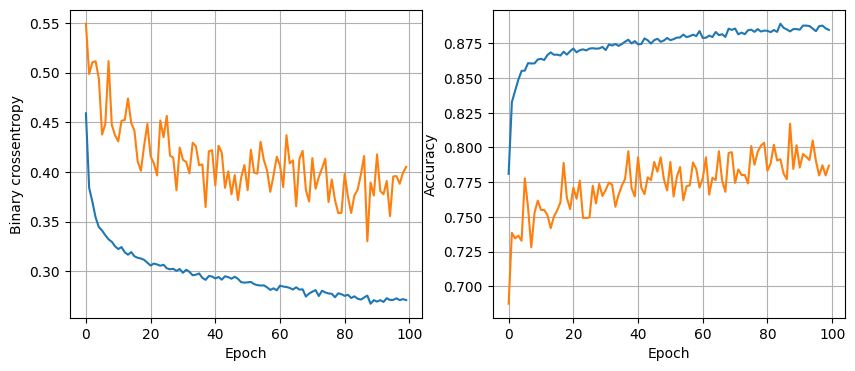

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8761 - loss: 0.3059
64 nodes, dropout 0.2, learning rate 0.001, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7249 - loss: 0.5515 - val_accuracy: 0.6874 - val_loss: 0.5726
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8225 - loss: 0.4022 - val_accuracy: 0.7207 - val_loss: 0.5303
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8410 - loss: 0.3761 - val_accuracy: 0.7207 - val_loss: 0.5235
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8436 - loss: 0.3691 - val_accuracy: 0.7361 - val_loss: 0.5073
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8462 - loss: 0.3648 - val_accuracy: 0.7576 - val_loss: 0.4798
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8508 - loss: 0.3579 - val_accuracy: 0.7603 - val_loss: 0.4643
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8514 - loss: 0

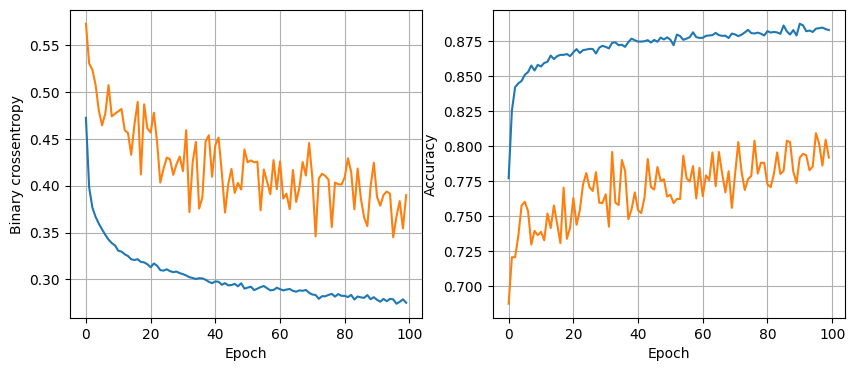

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.3095
64 nodes, dropout 0.2, learning rate 0.001, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6720 - loss: 0.5907 - val_accuracy: 0.6545 - val_loss: 0.5901
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8067 - loss: 0.4189 - val_accuracy: 0.6729 - val_loss: 0.5849
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8292 - loss: 0.3887 - val_accuracy: 0.7375 - val_loss: 0.5044
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8330 - loss: 0.3857 - val_accuracy: 0.7304 - val_loss: 0.5055
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8439 - loss: 0.3647 - val_accuracy: 0.7328 - val_loss: 0.5042
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8479 - loss: 0.3630 - val_accuracy: 0.7613 - val_loss: 0.4634
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8488 - loss: 0.3549 - val_a

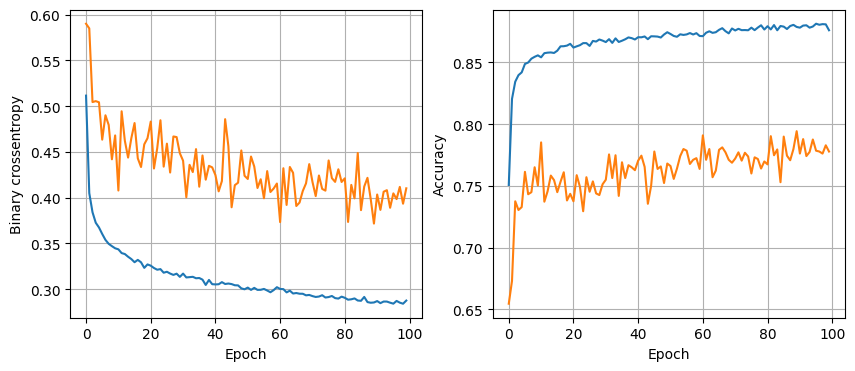

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8749 - loss: 0.3167
64 nodes, dropout 0.2, learning rate 0.005, batch size 32, 100 epochs
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7894 - loss: 0.4505 - val_accuracy: 0.7795 - val_loss: 0.4036
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8516 - loss: 0.3548 - val_accuracy: 0.7150 - val_loss: 0.5265
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8585 - loss: 0.3448 - val_accuracy: 0.6931 - val_loss: 0.5559
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8586 - loss: 0.3397 - val_accuracy: 0.7237 - val_loss: 0.4658
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8549 - loss: 0.3385 - val_accuracy: 0.8094 - val_loss: 0.3694
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8530 - loss: 0.3338 - val_accuracy: 0.7953 - val_loss: 0.3710
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8640 - loss: 0

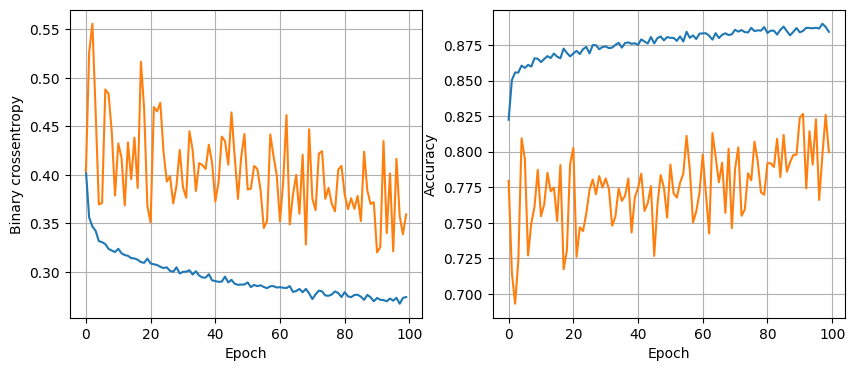

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3156
64 nodes, dropout 0.2, learning rate 0.005, batch size 64, 100 epochs
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7888 - loss: 0.4544 - val_accuracy: 0.7133 - val_loss: 0.5616
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8454 - loss: 0.3635 - val_accuracy: 0.7439 - val_loss: 0.4840
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8551 - loss: 0.3524 - val_accuracy: 0.6961 - val_loss: 0.5560
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8530 - loss: 0.3446 - val_accuracy: 0.7835 - val_loss: 0.4057
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8643 - loss: 0.3248 - val_accuracy: 0.7529 - val_loss: 0.4592
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8625 - loss: 0.3258 - val_accuracy: 0.7526 - val_loss: 0.4430
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8635 - loss: 0

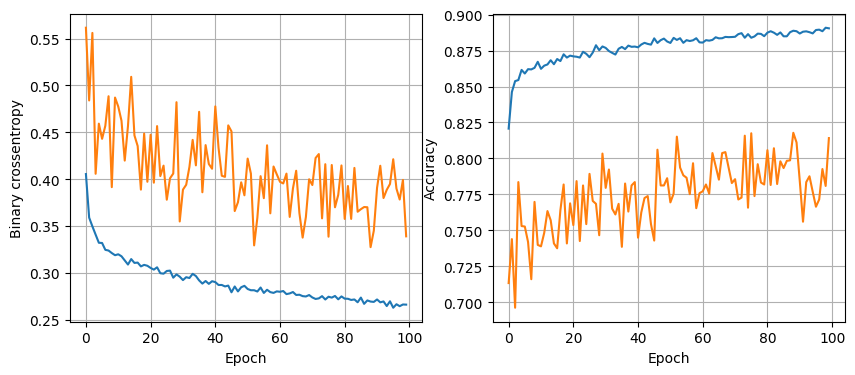

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3121
64 nodes, dropout 0.2, learning rate 0.005, batch size 128, 100 epochs
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7490 - loss: 0.4887 - val_accuracy: 0.7237 - val_loss: 0.5480
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8432 - loss: 0.3695 - val_accuracy: 0.7089 - val_loss: 0.5837
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8545 - loss: 0.3442 - val_accuracy: 0.7479 - val_loss: 0.4787
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8537 - loss: 0.3419 - val_accuracy: 0.7348 - val_loss: 0.5011
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8626 - loss: 0.3261 - val_accuracy: 0.7153 - val_loss: 0.5045
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8673 - loss: 0.3215 - val_accuracy: 0.7227 - val_loss: 0.5141
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8624 - loss: 0.3242 - val_a

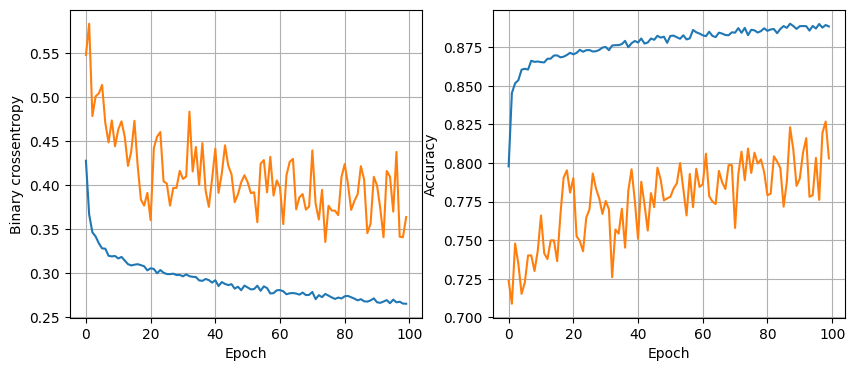

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8734 - loss: 0.3102


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01,0.001,0.005]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate {lr}, batch size {batch_size}, {epochs} epochs")
        model,history = train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test,y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1365
           1       0.86      0.96      0.91      2439

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.88      0.87      0.87      3804

